# Improving Your Model Performance
>  In the previous chapters, you've trained a lot of models! You will now learn how to interpret learning curves to understand your models as they train. You will also visualize the effects of activation functions, batch-sizes, and batch-normalization. Finally, you will learn how to perform automatic hyperparameter optimization to your Keras models using sklearn.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 3 exercises "Introduction to Deep Learning with Keras" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
plt.rcParams['figure.figsize'] = (8, 8)

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K

## Learning curves

### Learning the digits

<div class=""><p>You're going to build a model on the <strong>digits dataset</strong>, a sample dataset that comes pre-loaded with scikit learn. The <strong>digits dataset</strong> consist of <strong>8x8 pixel handwritten digits from 0 to 9</strong>:
</p><center>
<img src="https://assets.datacamp.com/production/repositories/4335/datasets/a4236d3a85ce1aaf5361ed7549b18b9d4de00860/digits_dataset_sample.png" width="450px"> 
</center>
You want to distinguish between each of the 10 possible digits given an image, so we are dealing with <strong>multi-class classification</strong>.<p></p>
<p>The dataset has already been partitioned into <code>X_train</code>, <code>y_train</code>, <code>X_test</code>, and <code>y_test</code>, using 30% of the data as testing data. The labels are already one-hot encoded vectors, so you don't need to use Keras <code>to_categorical()</code> function. </p>
<p>Let's build this new <code>model</code>!</p></div>

In [31]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/16-introduction-to-deep-learning-with-keras/datasets/digits.h5

In [32]:
import h5py
h5f = h5py.File('digits.h5','r')
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
h5f.close()

Instructions
<ul>
<li>Add a <code>Dense</code> layer of 16 neurons with <code>relu</code> activation and an <code>input_shape</code> that takes the <strong>total number of pixels</strong> of the 8x8 digit image.</li>
<li>Add a <code>Dense</code> layer with 10 outputs and <code>softmax</code> activation.</li>
<li>Compile your model with <code>adam</code>, <code>categorical_crossentropy</code>, and <code>accuracy</code> metrics.</li>
<li>Make sure your model works by predicting on <code>X_train</code>.</li>
</ul>

In [30]:
# Instantiate a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu 
model.add(Dense(16, input_shape = (64,), activation = 'relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(Dense(10, activation = 'softmax'))

# Compile your model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Test if your model is well assembled by predicting before training
print(model.predict(X_train))

[[7.7875102e-06 9.8311412e-01 3.3095466e-06 ... 2.6816213e-07
  3.7752077e-06 1.6074009e-02]
 [2.5265625e-09 9.9987948e-01 9.2032240e-09 ... 4.4324835e-11
  9.1291659e-09 4.0083858e-05]
 [9.8604402e-11 9.9982858e-01 7.5981549e-10 ... 2.8126260e-12
  6.1428453e-09 2.1878817e-05]
 ...
 [2.0637112e-11 9.9997449e-01 1.1528984e-09 ... 2.2512329e-13
  1.0801824e-09 8.6788314e-06]
 [7.0880082e-16 9.9999261e-01 5.2638757e-12 ... 7.8338075e-16
  4.7642362e-10 7.2575576e-06]
 [2.4135589e-09 9.9860817e-01 3.5583992e-07 ... 9.6721450e-12
  1.3540859e-08 3.1840213e-05]]


**Predicting on training data inputs before training can help you quickly check that your model works as expected.**

### Is the model overfitting?

<div class=""><p>Let's train the <code>model</code> you just built and plot its learning curve to check out if it's overfitting!
You can make use of the loaded function <code>plot_loss()</code> to plot training loss against validation loss, you can get both from the history callback.</p>
<p>If you want to inspect the <code>plot_loss()</code> function code, paste this in the console: <code>show_code(plot_loss)</code></p></div>

In [11]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

Instructions 1/2
<ul>
<li>Train your model for 60 <code>epochs</code>, using <code>X_test</code> and <code>y_test</code> as validation data.</li>
<li>Use <code>plot_loss()</code> passing <code>loss</code> and <code>val_loss</code> as extracted from the history attribute of the <code>h_callback</code> object.</li>
</ul>

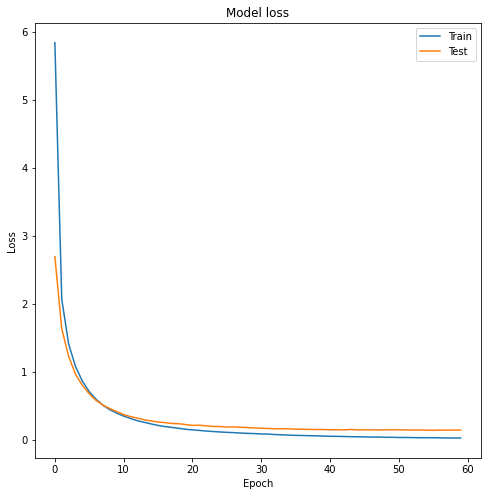

In [21]:
# Train your model for 60 epochs, using X_test and y_test as validation data
h_callback = model.fit(X_train, y_train, epochs = 60, validation_data = (X_test, y_test), verbose=0)

# Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

Instructions 2/2
<pre>
Possible Answers

Yes, it started to overfit since the test loss is higher than the training loss.

<b>No, the test loss is not getting higher as the epochs go by.</b>
</pre>

**This graph doesn't show overfitting but convergence. It looks like your model has learned all it could from the data and it no longer improves. The test loss, although higher than the training loss, is not getting worse, so we aren't overfitting to the training data.**

### Do we need more data?

<div class=""><p>It's time to check whether the <strong>digits dataset</strong> <code>model</code> you built benefits from more training examples!</p>
<p>In order to keep code to a minimum, various things are already initialized and ready to use:</p>
<ul>
<li>The <code>model</code> you just built.</li>
<li><code>X_train</code>,<code>y_train</code>,<code>X_test</code>, and <code>y_test</code>.</li>
<li>The <code>initial_weights</code> of your model, saved after using <code>model.get_weights()</code>.</li>
<li>A pre-defined list of training sizes: <code>training_sizes</code>.</li>
<li>A pre-defined early stopping callback monitoring loss: <code>early_stop</code>.</li>
<li>Two empty lists to store the evaluation results: <code>train_accs</code> and <code>test_accs</code>.</li>
</ul>
<p>Train your model on the different training sizes and evaluate the results on <code>X_test</code>.
End by plotting the results with <code>plot_results()</code>.</p>
<p>The full code for this exercise can be found on the slides!</p></div>

In [22]:
def plot_results(train_accs,test_accs):
  plt.plot(training_sizes, train_accs, 'o-', label="Training Accuracy")
  plt.plot(training_sizes, test_accs, 'o-', label="Test Accuracy")
  plt.title('Accuracy vs Number of training samples')
  plt.xlabel('# of training samples')
  plt.ylabel('Accuracy')
  plt.legend(loc="best")
  plt.show()

In [ ]:
model = Sequential()
model.add(Dense(16, input_shape = (64,), activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
initial_weights = model.get_weights()
early_stop = EarlyStopping(monitor='loss', patience=1)
train_accs, test_accs = [], []
training_sizes = [125, 502, 879, 1255]

Instructions
<ul>
<li>Get a fraction of the training data determined by the <code>size</code> we are currently evaluating in the loop.</li>
<li>Set the model weights to the <code>initial_weights</code> with <code>set_weights()</code> and train your model on the fraction of training data using <code>early_stop</code> as a callback.</li>
<li>Evaluate and store the accuracy for the training fraction and the test set.</li>
<li>Call <code>plot_results()</code> passing in the training and test accuracies for each training size.</li>
</ul>

Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 15.6349 - accuracy: 0.1263
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 13.3645 - accuracy: 0.1054
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 11.2026 - accuracy: 0.1220
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 9.9651 - accuracy: 0.1211
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 8.3072 - accuracy: 0.1106
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 7.3028 - accuracy: 0.1377
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 5.8000 - accuracy: 0.1753
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 5.2914 - accuracy: 0.1659
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 4.5160 - accuracy: 0.1525
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 3.9556 - accuracy: 0.1490
Epoch 11/50
4/4 [===================

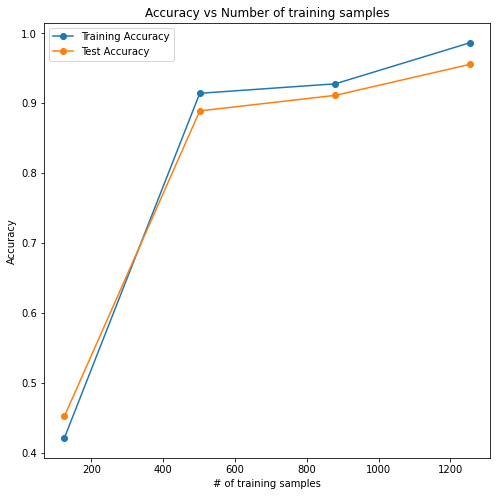

In [32]:
for size in training_sizes:
  	# Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    # Reset the model to the initial weights and train it on the new training data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop])

    # Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train, y_train)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])
    
# Plot train vs test accuracies
plot_results(train_accs, test_accs)

**that was a lot of code to understand! The results shows that your model would not benefit a lot from more training data, since the test set accuracy is already starting to flatten. It's time to look at activation funtions!**

## Activation functions

### Different activation functions

<div class=""><p>The <code>sigmoid()</code>,<code>tanh()</code>, <code>ReLU()</code>, and <code>leaky_ReLU()</code> functions have been defined and ready for you to use. Each function receives an input number <em>X</em> and returns its corresponding <em>Y</em> value.</p>
<p>Which of the statements below is <strong>false</strong>?</p></div>

<pre>
Possible Answers

The sigmoid() takes a value of 0.5 when X = 0 whilst tanh() takes a value of 0.

The leaky_ReLU() takes a value of -0.01 when X = -1 whilst ReLU() takes a value of 0.

<b>The sigmoid() and tanh() both take values close to -1 for big negative numbers.</b>
</pre>

**For big negative numbers the sigmoid approaches 0 not -1 whilst the tanh() does take values close to -1.**

### Comparing activation functions

<div class=""><p>Comparing activation functions involves a bit of coding, but nothing you can't do! </p>
<p>You will try out different activation functions on the <strong>multi-label model</strong> you built for your farm irrigation machine in chapter 2. The function <code>get_model('relu')</code> returns a copy of this model and applies the <code>'relu'</code> activation function to its hidden layer. </p>
<p>You will loop through several activation functions, generate a new model for each and train it. By storing the history callback in a dictionary you will be able to visualize which activation function performed best in the next exercise!</p>
<p><code>X_train</code>, <code>y_train</code>, <code>X_test</code>, <code>y_test</code> are ready for you to use when training your models.</p></div>

In [34]:
df = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/16-introduction-to-deep-learning-with-keras/datasets/irrigation_machine.csv', index_col=0)

In [72]:
parcels = df[['parcel_0', 'parcel_1', 'parcel_2']].to_numpy()
sensors = df.drop(['parcel_0', 'parcel_1', 'parcel_2'], axis=1).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(sensors, parcels, test_size=0.3, random_state=1)

In [87]:
class ModelWrapper():
  
  # load wrapped model
  def __init__(self,act_function):
    K.clear_session() #keras.backend.clear_session() #
    self.__model = Sequential()
    if act_function == 'leaky_relu':
      self.__model.add(Dense(64, input_shape=(20,)))
      self.__model.add(LeakyReLU())
    else:
      self.__model.add(Dense(64, input_shape=(20,), activation=act_function))
    self.__model.add(Dense(3, activation='sigmoid'))
    self.__model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

  # wrap fit
  def fit(self,X_train, y_train, validation_data, epochs, verbose=0):
    
	# check values match
    #if epochs!=20:
      #raise ValueError("Make sure you're using only 20 epochs!")
    if not isinstance(validation_data,tuple):
      raise ValueError("Make sure you pass your validation_data as a tuple!")
           
    return self.__model.fit(X_train, 
                            y_train,
                            epochs=epochs,
                            validation_data = validation_data,
                            verbose=verbose)
  
  # for every other function work as usual
  def __getattr__(self,attr):
        orig_attr = self.__model.__getattribute__(attr)
        if callable(orig_attr):
            def hooked(*args, **kwargs):
                result = orig_attr(*args, **kwargs)
                # prevent model from becoming unwrapped
                if result == self.__model:
                    return self
                return result
            return hooked
        else:
            return orig_attr

In [91]:
# Set a random seed
np.random.seed(1)

def get_model(act_function):
  if act_function not in ['relu', 'leaky_relu', 'sigmoid', 'tanh']:
    raise ValueError('Make sure your activation functions are named correctly!')
  print("Finishing with",act_function,"...")
  return ModelWrapper(act_function)

Instructions
<ul>
<li>Fill up the activation functions array  with <code>relu</code>,<code>leaky_relu</code>, <code>sigmoid</code>, and <code>tanh</code>.</li>
<li>Get a new model for each iteration with <code>get_model()</code> passing the current activation function as a parameter.</li>
<li>Fit your model providing the train and <code>validation_data</code>, use 20 <code>epochs</code> and set verbose to 0.</li>
</ul>

In [92]:
# Activation functions to try
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
  # Get a new model with the current activation
  model = get_model(act)
  # Fit the model and store the history results
  h_callback = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=0)
  activation_results[act] = h_callback

Finishing with relu ...
Finishing with leaky_relu ...
Finishing with sigmoid ...
Finishing with tanh ...


**You've trained 4 models, each with a different activation function, let's see how well they performed!**

### Comparing activation functions II

<div class=""><p>What you coded in the previous exercise has been executed to obtain the<code>activation_results</code> variable, this time <strong>100 epochs were used instead of 20</strong>. This way you will have more epochs to further compare how the training evolves per activation function.</p>
<p>For every <code>h_callback</code> of each activation function in <code>activation_results</code>:</p>
<ul>
<li>The <code>h_callback.history['val_loss']</code> has been extracted.</li>
<li>The <code>h_callback.history['val_acc']</code> has been extracted.</li>
</ul>
<p>Both are saved into two dictionaries: <code>val_loss_per_function</code> and <code>val_acc_per_function</code>.</p>
<p>Pandas is also loaded as <code>pd</code> for you to use. Let's plot some quick validation loss and accuracy charts!</p></div>

In [93]:
activation_results = {}
for act in activations:
  model = get_model(act)
  h_callback = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
  activation_results[act] = h_callback

Finishing with relu ...
Finishing with leaky_relu ...
Finishing with sigmoid ...
Finishing with tanh ...


In [94]:
# Extract val_loss history of each activation function
val_loss_per_function = {k:v.history['val_loss'] for k,v in activation_results.items()}
# Extract val_accuracy history of each activation function
val_acc_per_function = {k:v.history['val_accuracy'] for k,v in activation_results.items()}
# Turn the dictionary into a pandas dataframe
val_loss_curves = pd.DataFrame(val_loss_per_funct)

Instructions
<ul>
<li>Use <code>pd.DataFrame()</code>to create a new DataFrame from the <code>val_loss_per_function</code> dictionary.</li>
<li>Call <code>plot()</code> on the DataFrame.</li>
<li>Create another pandas DataFrame from <code>val_acc_per_function</code>.</li>
<li>Once again, plot the DataFrame.</li>
</ul>

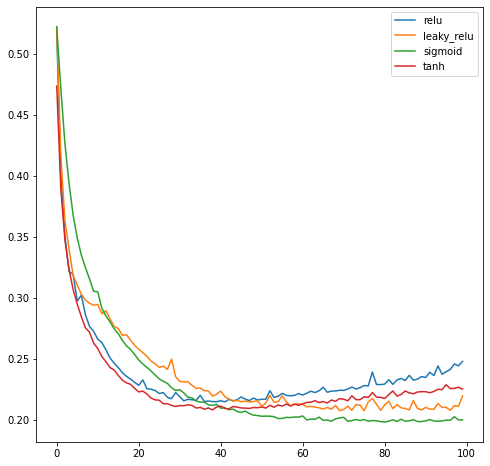

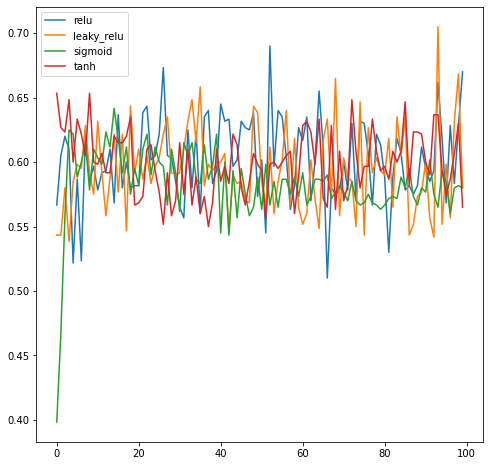

In [95]:
# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(val_loss_per_function)

# Call plot on the dataframe
val_loss.plot()
plt.show()

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_acc_per_function)

# Call plot on the dataframe
val_acc.plot()
plt.show()

**You've plotted both: loss and accuracy curves. It looks like sigmoid activation worked best for this particular model as the hidden layer's activation function. It led to a model with lower validation loss and higher accuracy after 100 epochs.**

## Batch size and batch normalization

### Changing batch sizes

<div class=""><p>You've seen models are usually trained in batches of a fixed size. The smaller a batch size, the more weight updates per epoch, but at a cost of a more unstable gradient descent. Specially if the batch size is too small and it's not representative of the entire training set. </p>
<p>Let's see how different batch sizes affect the accuracy of a simple binary classification model that separates red from blue dots.</p>
<p>You'll use a batch size of one, updating the weights once per sample in your training set for each epoch. Then you will use the entire dataset, updating the weights only once per epoch.</p></div>

In [3]:
df = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/16-introduction-to-deep-learning-with-keras/datasets/dots.csv')

In [25]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
def get_model():
  model = Sequential()
  model.add(Dense(4,input_shape=(2,),activation='relu'))
  model.add(Dense(1,activation="sigmoid"))
  model.compile('sgd', 'binary_crossentropy', metrics=['accuracy'])
  return model

Instructions 1/2
<p>Use <code>get_model()</code> to get a new, already compiled, model, then train your model for 5 <code>epochs</code> with a <code>batch_size</code> of 1.</p>

In [26]:
# Get a fresh new model with get_model
model = get_model()

# Train your model for 5 epochs with a batch size of 1
model.fit(X_train, y_train, epochs=5, batch_size=1)
print("\n The accuracy when using a batch of size 1 is: ",
      model.evaluate(X_test, y_test)[1])

Epoch 1/5
700/700 [==============================] - 1s 879us/step - loss: 0.7007 - accuracy: 0.6286
Epoch 2/5
700/700 [==============================] - 1s 848us/step - loss: 0.5817 - accuracy: 0.8219
Epoch 3/5
700/700 [==============================] - 1s 874us/step - loss: 0.5173 - accuracy: 0.8554
Epoch 4/5
700/700 [==============================] - 1s 884us/step - loss: 0.4509 - accuracy: 0.8769
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3811 - accuracy: 0.8467

 The accuracy when using a batch of size 1 is:  0.846666693687439


Instructions 2/2
<p>Now train a new model with <code>batch_size</code> equal to the size of the training set.</p>

In [27]:
model = get_model()

# Fit your model for 5 epochs with a batch of size the training set
model.fit(X_train, y_train, epochs=5, batch_size=len(X_train))
print("\n The accuracy when using the whole training set as batch-size was: ",
      model.evaluate(X_test, y_test)[1])

Epoch 1/5
1/1 [==============================] - 0s 278ms/step - loss: 0.7207 - accuracy: 0.4871
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 0.7205 - accuracy: 0.4886
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 0.7203 - accuracy: 0.4871
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 0.7200 - accuracy: 0.4871
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.5133

 The accuracy when using the whole training set as batch-size was:  0.5133333206176758


**You can see that accuracy is lower when using a batch size equal to the training set size. This is not because the network had more trouble learning the optimization function: Even though the same number of epochs were used for both batch sizes the number of resulting weight updates was very different!. With a batch of size the training set and 5 epochs we only get 5 updates total, each update computes and averaged gradient descent with all the training set observations. To obtain similar results with this batch size we should increase the number of epochs so that more weight updates take place.**

### Batch normalizing a familiar model

<div class=""><p>Remember the <strong>digits dataset</strong> you trained in the first exercise of this chapter? 
</p><center>
<img src="https://assets.datacamp.com/production/repositories/4335/datasets/a4236d3a85ce1aaf5361ed7549b18b9d4de00860/digits_dataset_sample.png" width="450px/"> 
</center>
A multi-class classification problem that you solved using <code>softmax</code> and 10 neurons in your output layer.<p></p>
<p>You will now build a new deeper model consisting of 3 hidden layers of 50 neurons each, using batch normalization in between layers. 
The <code>kernel_initializer</code> parameter is used to initialize weights in a similar way.</p></div>

Instructions
<ul>
<li>Import <code>BatchNormalization</code> from keras layers.</li>
<li>Build your deep network model, use <strong>50 neurons for each hidden layer</strong> adding batch normalization in between layers.</li>
<li>Compile your model with stochastic gradient descent, <code>sgd</code>, as an optimizer.</li>
</ul>

In [44]:
# Import batch normalization from keras layers
from keras.layers import BatchNormalization

# Build your deep network
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

**That was a deep model indeed. Let's compare how it performs against this very same model without batch normalization!**

### Batch normalization effects

<div class=""><p>Batch normalization tends to increase the learning speed of our models and make their learning curves more stable. Let's see how two identical models with and without batch normalization compare.</p>
<p>The model you just built <code>batchnorm_model</code> is loaded for you to use. An exact copy of it without batch normalization: <code>standard_model</code>, is available as well. You can check their <code>summary()</code> in the console. <code>X_train</code>, <code>y_train</code>, <code>X_test</code>, and <code>y_test</code> are also loaded so that you can train both models. </p>
<p>You will compare the accuracy learning curves for both models plotting them with <code>compare_histories_acc()</code>.</p>
<p>You can check the function pasting <code>show_code(compare_histories_acc)</code> in the console.</p></div>

In [43]:
h5f = h5py.File('digits.h5','r')
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
h5f.close()

In [45]:
standard_model = Sequential()
standard_model.add(Dense(50, input_shape=(64, ), activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
standard_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
def compare_histories_acc(h1,h2):
  plt.plot(h1.history['accuracy'])
  plt.plot(h1.history['val_accuracy'])
  plt.plot(h2.history['accuracy'])
  plt.plot(h2.history['val_accuracy'])
  plt.title("Batch Normalization Effects")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')
  plt.show()

Instructions
<ul>
<li>Train the <code>standard_model</code>  for 10 epochs passing in train and validation data, storing its history in <code>h1_callback</code>.</li>
<li>Train your <code>batchnorm_model</code> for 10 epochs passing in train and validation data, storing its history in <code>h2_callback</code>.</li>
<li>Call <code>compare_histories_acc</code> passing in <code>h1_callback</code> and <code>h2_callback</code>.</li>
</ul>

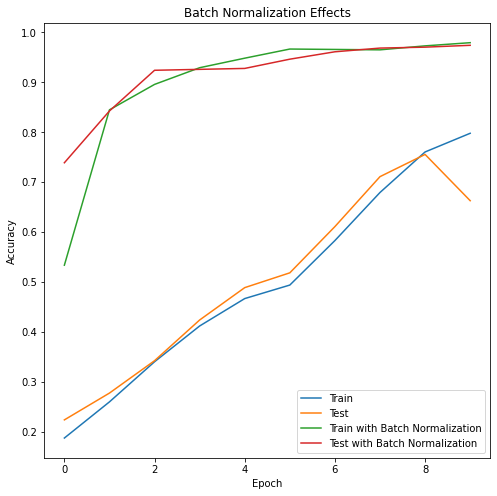

In [47]:
# Train your standard model, storing its history callback
h1_callback = standard_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, verbose=0)

# Train the batch normalized model you recently built, store its history callback
h2_callback = batchnorm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)

# Call compare_histories_acc passing in both model histories
compare_histories_acc(h1_callback, h2_callback)

**You can see that for this deep model batch normalization proved to be useful, helping the model obtain high accuracy values just over the first 10 training epochs.**

## Hyperparameter tuning

### Preparing a model for tuning

<div class=""><p>Let's tune the hyperparameters of a <strong>binary classification</strong> model that does well classifying the <strong>breast cancer dataset</strong>.</p>
<p>You've seen that the first step to turn a model into a sklearn estimator is to build a function that creates it. The definition of this function is important since hyperparameter tuning is carried out by varying the arguments your function receives. </p>
<p>Build a simple <code>create_model()</code> function that receives both a learning rate and an activation function as arguments. The <code>Adam</code> optimizer has been imported as an object from <code>keras.optimizers</code> so that you can also change its learning rate parameter.</p></div>

Instructions
<ul>
<li>Set the learning rate of the <code>Adam</code> optimizer object to the one passed in the arguments.</li>
<li>Set the hidden layers activations to the one passed in the arguments.</li>
<li>Pass the optimizer and the binary cross-entropy loss to the <code>.compile()</code> method.</li>
</ul>

In [102]:
from keras.optimizers import Adam
import tensorflow as tf
#@tf.function(experimental_relax_shapes=True)
# Creates a model given an activation and learning rate
def create_model(learning_rate, activation):
  
  	# Create an Adam optimizer with the given learning rate
  	opt = Adam(lr = learning_rate)
  	
  	# Create your binary classification model  
  	model = Sequential()
  	model.add(Dense(128, input_shape = (30,), activation = activation))
  	model.add(Dense(256, activation = activation))
  	model.add(Dense(1, activation = 'sigmoid'))
  	
  	# Compile your model with your optimizer, loss, and metrics
  	model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
  	return model

**With this function ready you can now create a sklearn estimator and generate different models to perform simple hyperparameter tuning on!**

### Tuning the model parameters

<div class=""><p>It's time to try out different parameters on your model and see how well it performs!</p>
<p>The <code>create_model()</code> function you built in the previous exercise is ready for you to use.</p>
<p>Since fitting the <code>RandomizedSearchCV</code> object would take too long, the results you'd get are printed in the <code>show_results()</code> function.
You could try <code>random_search.fit(X,y)</code> in the console yourself to check it does work after you have built everything else, but you will probably timeout the exercise (so copy your code first if you try this or you can lose your progress!).</p>
<p>You don't need to use the optional <code>epochs</code> and <code>batch_size</code> parameters when building your <code>KerasClassifier</code> object since you are passing them as <code>params</code> to the random search and this works already.</p></div>

In [127]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

Instructions
<ul>
<li>Import <code>KerasClassifier</code> from keras <code>scikit_learn</code> wrappers.</li>
<li>Use your <code>create_model</code> function when instantiating your <code>KerasClassifier</code>.</li>
<li>Set <code>'relu'</code> and <code>'tanh'</code> as <code>activation</code>, 32, 128, and 256 as <code>batch_size</code>, 50, 100, and 200 <code>epochs</code>, and <code>learning_rate</code> of 0.1, 0.01, and 0.001.</li>
<li>Pass your converted <code>model</code> and the chosen <code>params</code> as you build your <code>RandomizedSearchCV</code> object.</li>
</ul>

In [90]:
# Import KerasClassifier from keras scikit learn wrappers
from keras.wrappers.scikit_learn import KerasClassifier

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation': ['relu', 'tanh'], 'batch_size': [32, 128, 256], 
          'epochs': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

In [94]:
tf.get_logger().setLevel('ERROR')
random_search_results = random_search.fit(X, y, verbose=0)
print("Best: {} using {}".format(random_search_results.best_score_, random_search_results.best_params_))

6/6 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.8624
Best: 0.9349948962529501 using {'learning_rate': 0.01, 'epochs': 200, 'batch_size': 256, 'activation': 'relu'}


**I'm glad you didn't run random_search.fit(X,y),datacamp servers are still working. Now that we have a better idea of which parameters perform best, lets use them!**

### Training with cross-validation

<div class=""><p>Time to train your model with the best parameters found: <strong>0.001</strong> for the <strong>learning rate</strong>, <strong>50 epochs</strong>, <strong>a 128 batch_size</strong> and <strong>relu activations</strong>. </p>
<p>The <code>create_model()</code> function from the previous exercise is ready for you to use. <code>X</code> and <code>y</code> are loaded as features and labels. </p>
<p>Use the best values found for your model when creating your <code>KerasClassifier</code> object so that they are used when performing cross_validation.</p>
<p>End this chapter by training an awesome tuned model on the <strong>breast cancer dataset</strong>!</p></div>

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
def create_model(learning_rate = 0.001, activation = 'relu'):
  opt = Adam(lr = learning_rate)
  model = Sequential()
  model.add(Dense(128,input_shape = (30,),activation = activation))
  model.add(Dense(256,activation = activation))
  model.add(Dense(1,activation = 'sigmoid'))
  model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])
  return model

Instructions
<ul>
<li>Import <code>KerasClassifier</code> from keras <code>scikit_learn</code> wrappers.</li>
<li>Create a <code>KerasClassifier</code> object providing the best parameters found.</li>
<li>Pass your <code>model</code>, features and labels to <code>cross_val_score</code> to perform cross-validation with 3 folds.</li>
</ul>

In [130]:
# Create a KerasClassifier
model = KerasClassifier(lambda: create_model(learning_rate = 0.001, activation = 'relu'), epochs = 50, batch_size = 128, verbose = 0)
#model = KerasClassifier(build_fn = create_model(learning_rate = 0.001, activation = 'relu'), epochs = 50, batch_size = 128, verbose = 0)

# Calculate the accuracy score for each fold
kfolds = cross_val_score(model, X, y, cv = 3)

# Print the mean accuracy
print('The mean accuracy was:', kfolds.mean())

# Print the accuracy standard deviation
print('With a standard deviation of:', kfolds.std())

The mean accuracy was: 0.9192054271697998
With a standard deviation of: 0.023557991552076663


```
<script.py> output:
    The mean accuracy was: 0.9718834066666666
    With a standard deviation of: 0.002448915612216046
```

**You can now test out different parameters on your networks and find the best models. Congratulations on making it this far, this chapter was quite a challengue! You're now left with a final chapter full of fun models to play with.**